In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv("Threats.csv")
data.head()

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,2539.242797,31,29,8.888889e+05,9.559864e+05,4,4,0.846067,0.737706,58.402734,1.340626,255,1292568769,3444059673,255,0.000563,0.000452,0.000111,96,91,0,0,6,0,6,2,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,5583.879675,31,29,1.895606e+06,4.024278e+06,4,4,0.341455,0.320636,17.194049,0.386183,255,1045213639,1045527320,255,0.000721,0.000583,0.000138,89,188,0,0,8,0,2,1,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,3036.437382,31,29,5.910931e+05,7.206478e+05,0,0,0.009000,0.004000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,73,89,0,0,3,0,3,2,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,31,29,5.676935e+04,6.893170e+04,54,67,14.916100,14.407422,1141.623737,1123.539984,255,1340049482,1340354252,255,0.001251,0.001104,0.000147,106,124,0,0,1,0,4,1,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,747.642372,31,29,1.724218e+05,2.588761e+06,7,30,2.765914,2.649630,182.627025,175.704486,255,932567253,3116620258,255,0.000655,0.000517,0.000138,59,860,0,0,3,0,6,1,1,5,0,0,0,6,12,0,Normal,0


In [3]:
data.drop(columns=['Unnamed: 0','id'], inplace=True)
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.012996,tcp,-,FIN,16,18,1540,1644,2539.242797,31,29,8.888889e+05,9.559864e+05,4,4,0.846067,0.737706,58.402734,1.340626,255,1292568769,3444059673,255,0.000563,0.000452,0.000111,96,91,0,0,6,0,6,2,1,6,0,0,0,5,7,0,Normal,0
1,0.004119,tcp,-,FIN,12,12,1064,2260,5583.879675,31,29,1.895606e+06,4.024278e+06,4,4,0.341455,0.320636,17.194049,0.386183,255,1045213639,1045527320,255,0.000721,0.000583,0.000138,89,188,0,0,8,0,2,1,1,1,0,0,0,3,8,0,Normal,0
2,0.000988,udp,dns,CON,2,2,146,178,3036.437382,31,29,5.910931e+05,7.206478e+05,0,0,0.009000,0.004000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,73,89,0,0,3,0,3,2,1,2,0,0,0,7,2,0,Normal,0
3,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,31,29,5.676935e+04,6.893170e+04,54,67,14.916100,14.407422,1141.623737,1123.539984,255,1340049482,1340354252,255,0.001251,0.001104,0.000147,106,124,0,0,1,0,4,1,1,1,0,0,0,4,1,0,Normal,0
4,0.193943,tcp,-,FIN,72,74,4238,63618,747.642372,31,29,1.724218e+05,2.588761e+06,7,30,2.765914,2.649630,182.627025,175.704486,255,932567253,3116620258,255,0.000655,0.000517,0.000138,59,860,0,0,3,0,6,1,1,5,0,0,0,6,12,0,Normal,0


In [4]:
categorical_cols = ["state", "proto", "service", "attack_cat"]
label_encoder = {col:LabelEncoder() for col in categorical_cols} #creating an instance/object of the class LabelEncoder
for col in categorical_cols:
    data[col] = label_encoder[col].fit_transform(data[col]) #fit_transform is a method of the class LabelEncoder

In [5]:
X = data.drop(columns=["attack_cat", "label"]) #features
y = data["attack_cat"] #target

In [8]:
data_combined = pd.concat([X, y], axis=1)
oversampled_data = []
for attack_class in y.unique():
    class_data = data_combined[data_combined['attack_cat']==attack_class] 
    oversampled_class = resample(class_data, replace=True, n_samples=data_combined["attack_cat"].value_counts().max(), random_state=42)
    oversampled_data.append(oversampled_class)
data_balanced=pd.concat(oversampled_data)
X_balanced = data_balanced.drop(columns=["attack_cat"])
y_balanced = data_balanced["attack_cat"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

In [11]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder["attack_cat"].classes_))

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.51      0.49      0.50      8000
      Backdoor       0.43      0.61      0.51      8000
           DoS       0.40      0.50      0.44      8000
      Exploits       0.94      0.57      0.71      8000
       Fuzzers       0.95      0.87      0.91      8000
       Generic       1.00      0.99      0.99      8000
        Normal       0.95      0.96      0.95      8000
Reconnaissance       0.99      0.82      0.90      8000
     Shellcode       0.99      1.00      1.00      8000
         Worms       1.00      1.00      1.00      8000

      accuracy                           0.78     80000
     macro avg       0.82      0.78      0.79     80000
  weighted avg       0.82      0.78      0.79     80000



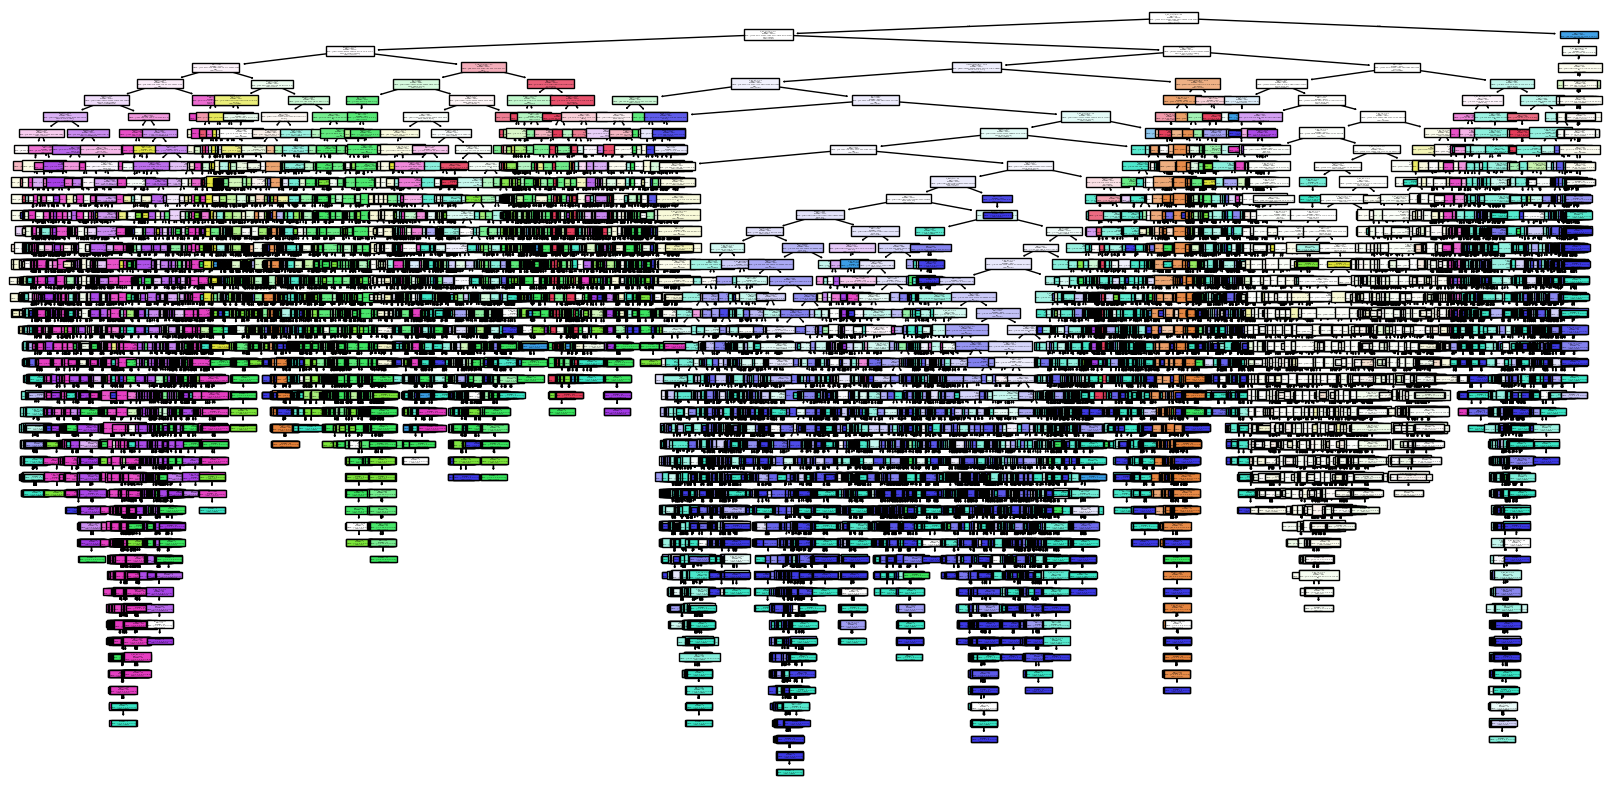

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_balanced.columns, class_names=label_encoder["attack_cat"].classes_)
plt.show()
#to simplify the decision tree and reduce overfitting, we can set max_depth for the tree, prune using ccp_alpha, select few suitable features only